<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/HW9/higgsbosonSearch_Savery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the training data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [3]:
pip install kaggle

In [4]:
cd drive/My\ Drive/

/content/drive/My Drive


In [5]:
cd DSPS2023/

/content/drive/My Drive/DSPS2023


In [6]:
ls kaggle.json

kaggle.json


In [7]:
#!mv kaggle.json .kaggle.json

In [8]:
#Already done
#!chmod 600 .kaggle.json

In [9]:
!ls -l .kaggle.json

ls: cannot access '.kaggle.json': No such file or directory


In [10]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [11]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                    title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                           29MB  2023-11-16 01:38:36           1069        118  1.0              
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data                   763KB  2023-11-21 17:56:32           3949         78  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset         LLM: 7 prompt training dataset                   41MB  2023-11-15 07:32:56           1399        108  1.0              
maso0dahmed/video-games-data                           Video Games Data                                  5MB  2023-11-25 19:0

In [12]:
#Directory already made
#!mkdir kaggleHiggs

In [13]:
cd kaggleHiggs/

/content/drive/My Drive/DSPS2023/kaggleHiggs


In [14]:
#Already downloaded
#!kaggle competitions download -c higgs-boson

In [15]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.csv  training.csv
higgs-boson.zip                          test.csv


In [16]:
higgsdata = pd.read_csv("training.csv")

In [17]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


The columns with a lot of -999.00 values could cause problems with trying to classify the data.

In [18]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [19]:
higgsdata.mean()

<ipython-input-19-cf5af3986e51>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  higgsdata.mean()


EventId                        224999.500000
DER_mass_MMC                      -49.023079
DER_mass_transverse_met_lep        49.239819
DER_mass_vis                       81.181982
DER_pt_h                           57.895962
DER_deltaeta_jet_jet             -708.420675
DER_mass_jet_jet                 -601.237051
DER_prodeta_jet_jet              -709.356603
DER_deltar_tau_lep                  2.373100
DER_pt_tot                         18.917332
DER_sum_pt                        158.432217
DER_pt_ratio_lep_tau                1.437609
DER_met_phi_centrality             -0.128305
DER_lep_eta_centrality           -708.985189
PRI_tau_pt                         38.707419
PRI_tau_eta                        -0.010973
PRI_tau_phi                        -0.008171
PRI_lep_pt                         46.660207
PRI_lep_eta                        -0.019507
PRI_lep_phi                         0.043543
PRI_met                            41.717235
PRI_met_phi                        -0.010119
PRI_met_su

The columns with negative means have a lot of -999 values. First, I will remove the 5 columns with means below -700. Then I will try using broadcasting to remove the remaining rows with -999 values.

In [20]:
higgsdata_new = higgsdata.drop(labels= ['DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_eta','PRI_jet_subleading_phi','DER_lep_eta_centrality'], axis = 1)


In [21]:
higgsdata_new.mean()

<ipython-input-21-3514202b71b4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  higgsdata_new.mean()


EventId                        224999.500000
DER_mass_MMC                      -49.023079
DER_mass_transverse_met_lep        49.239819
DER_mass_vis                       81.181982
DER_pt_h                           57.895962
DER_mass_jet_jet                 -601.237051
DER_deltar_tau_lep                  2.373100
DER_pt_tot                         18.917332
DER_sum_pt                        158.432217
DER_pt_ratio_lep_tau                1.437609
DER_met_phi_centrality             -0.128305
PRI_tau_pt                         38.707419
PRI_tau_eta                        -0.010973
PRI_tau_phi                        -0.008171
PRI_lep_pt                         46.660207
PRI_lep_eta                        -0.019507
PRI_lep_phi                         0.043543
PRI_met                            41.717235
PRI_met_phi                        -0.010119
PRI_met_sumet                     209.797178
PRI_jet_num                         0.979176
PRI_jet_leading_pt               -348.329567
PRI_jet_le

PRI_jet_subleading_pt has the most remaining -999 values, so I will use that column to broadcast into a new array after removing the -999 values.

In [22]:
higgsdata_final = higgsdata_new[higgsdata_new['PRI_jet_subleading_pt'] != -999]

higgsdata_final.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_mass_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,124.711,3.064,41.928,197.760,1.582,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,284.584,1.362,61.619,278.876,0.588,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,158.359,2.941,2.545,305.967,3.371,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,252.599,2.888,36.745,239.804,1.061,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,364.344,1.335,6.663,440.859,0.652,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,278.009,0.001503,s


In [23]:
higgsdata_final.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_mass_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight
count,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,...,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000,72543.000000
mean,224992.269950,54.325443,39.497470,79.125409,110.037042,371.783360,2.006838,28.361513,280.066431,1.492347,...,57.442476,0.004757,332.320727,2.305529,105.997712,-0.005919,-0.009550,57.679474,182.303526,0.487611
std,72245.756941,274.971728,36.194358,42.823701,75.592286,397.699325,0.784920,29.784435,129.205164,1.105309,...,43.697586,1.814082,139.051264,0.460634,67.573418,1.744084,1.808954,31.985782,107.581171,0.783589
min,100000.000000,-999.000000,0.000000,7.330000,0.120000,13.602000,0.228000,0.004000,110.601000,0.047000,...,0.200000,-3.142000,22.710000,2.000000,30.196000,-4.497000,-3.142000,30.000000,60.223000,0.001502
25%,162291.500000,89.206000,12.138500,57.148000,57.128500,111.977000,1.400000,4.403000,192.146500,0.771000,...,28.164500,-1.556000,237.659500,2.000000,60.426500,-1.337000,-1.573000,37.312000,108.947000,0.001503
50%,225073.000000,110.620000,29.620000,71.071000,93.352000,225.885000,1.951000,23.033000,245.653000,1.218000,...,46.739000,0.001000,303.269000,2.000000,86.587000,0.002000,-0.028000,47.902000,153.187000,0.071357
75%,287673.000000,131.880500,58.105000,89.096000,143.832500,478.226000,2.593000,40.098500,329.174000,1.867000,...,73.854500,1.572000,393.723000,3.000000,129.746000,1.324000,1.561000,66.637000,222.205500,0.744056
max,349994.000000,988.199000,690.075000,1329.913000,1053.807000,4974.979000,5.579000,513.659000,1852.462000,19.773000,...,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,1633.433000,7.805035


In [24]:
#Need to check all the means as I can't see some of the middle columns in the format above
higgsdata_final.mean()

<ipython-input-24-2fab2735c0cc>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  higgsdata_final.mean()


EventId                        224992.269950
DER_mass_MMC                       54.325443
DER_mass_transverse_met_lep        39.497470
DER_mass_vis                       79.125409
DER_pt_h                          110.037042
DER_mass_jet_jet                  371.783360
DER_deltar_tau_lep                  2.006838
DER_pt_tot                         28.361513
DER_sum_pt                        280.066431
DER_pt_ratio_lep_tau                1.492347
DER_met_phi_centrality              0.559420
PRI_tau_pt                         45.299583
PRI_tau_eta                        -0.001725
PRI_tau_phi                         0.001221
PRI_lep_pt                         52.463326
PRI_lep_eta                        -0.002325
PRI_lep_phi                         0.043739
PRI_met                            57.442476
PRI_met_phi                         0.004757
PRI_met_sumet                     332.320727
PRI_jet_num                         2.305529
PRI_jet_leading_pt                105.997712
PRI_jet_le

Removing the -999 values from the DER_prodeta_jet_jet column did remove the majority of -999 values in the other columns as I had wanted.

In [25]:
labels = np.asarray(higgsdata_final['Label'])

print(len(labels))

labels

72543


array(['s', 'b', 's', ..., 'b', 's', 'b'], dtype=object)

In [26]:
labels_bools = np.zeros(len(labels))

#Setting signal, s, as True and background, b, as False
for i in range(0,len(labels)):
  if labels[i] == 's':
    labels_bools[i] = True
  else:
    labels_bools[i] = False


labels_bools

array([1., 0., 1., ..., 0., 1., 0.])

In [27]:
weights = np.asarray(higgsdata_final['Weight'])
print(len(weights))
weights

72543


array([0.00265331, 0.08341403, 0.00265331, ..., 0.74405625, 0.0015027 ,
       0.06406078])

In [28]:
higgsdata_final2 = higgsdata_final.drop(labels= ['Label', 'Weight'], axis = 1)

higgsdata_final2.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_mass_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,124.711,3.064,41.928,197.760,1.582,...,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,113.497
5,100005,89.744,13.550,59.149,116.344,284.584,1.362,61.619,278.876,0.588,...,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,193.660
6,100006,148.754,28.862,107.782,106.130,158.359,2.941,2.545,305.967,3.371,...,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,179.877
11,100011,114.744,10.286,75.712,30.816,252.599,2.888,36.745,239.804,1.061,...,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,165.640
23,100023,141.481,0.736,111.581,174.075,364.344,1.335,6.663,440.859,0.652,...,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,278.009


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Higgs_train, Higgs_test, labels_train, labels_test = train_test_split(higgsdata_final2, labels_bools, test_size= 0.25)

- Use a Random Forest and a Gradient Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification


In [32]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(max_depth= 10, random_state = 25)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 25, 'verbose': 0, 'warm_start': False}


In [33]:
gbt = GradientBoostingClassifier(max_depth= 6, random_state= 25)
print('Parameters currently in use:\n')
print(gbt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 25, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [34]:
rf.fit(Higgs_train, labels_train)

RandomForestClassifier(max_depth=10, random_state=25)

In [35]:
gbt.fit(Higgs_train, labels_train)

GradientBoostingClassifier(max_depth=6, random_state=25)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [36]:
rf.score(Higgs_train,labels_train)

0.8643556895252449

In [37]:
rf.score(Higgs_test,labels_test)

0.8407587119541244

The drop between the training and testing scores is about 0.023, which is a reasonable value. This shows that the model isn't over fitting to the training dataset.

In [38]:
gbt.score(Higgs_train,labels_train)

0.8748690425864319

In [39]:
gbt.score(Higgs_test, labels_test)

0.8484230260255845

The drop bewteen the training and testing scores is 0.026, which is reasonable and pretty close to the drop seen in the rf model scores. Again shows that the model isn't overfitting to the training data.

I had to do several model tests to find what max depth for the 2 tree models would give reasonably high scores for both datasets without overfitting. Ended up using a depth of 10 for the rf model and 6 for the gbt model.

- Produce a confusion matrix for each model and compare them






In [40]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, normalize=False, title='', cmap=pl.cm.bone_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])
    pl.xlabel('prediction')
    pl.ylabel('truth')
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = pl.colorbar(im, cax=cax)


In [41]:
print(len(labels_test))


18136


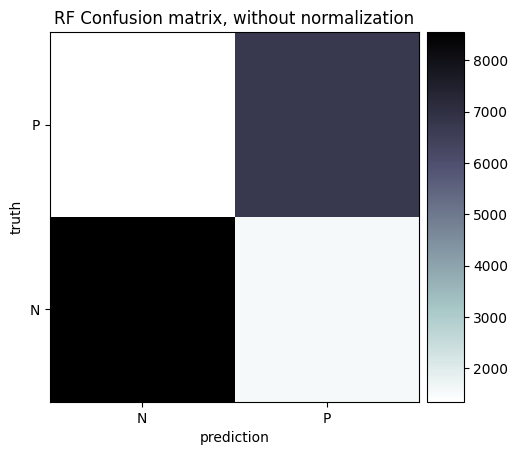

In [42]:
plot_confusion_matrix(labels_test, rf.predict(Higgs_test), title = 'RF')

I flipped the colorbar, because I was having trouble figuring out the level of false negatives and false positives. The false negatives and false positives are the on-diagonal squares, which both appear to have about 1000 counts. This amounts to about a 5.5% false negative rate and a 5.5% false positive rate.

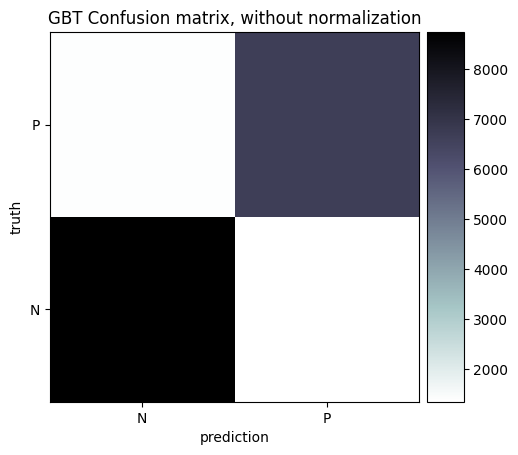

In [43]:
plot_confusion_matrix(labels_test, gbt.predict(Higgs_test), title = 'GBT')

The confusion matrix for the GBT model appears pretty similar to the RF matrix. This makes sense, seeing as they had scores with 0.01 of each other when the models were run on the test datasets. Again there appear to be about 1000 each of false negatives and false positives, which leads to 5.5% rate for both.

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [44]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata_final2, weights, test_size= 0.25)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=50, max_depth=6, random_state=25)

rfR.fit(traindata_weights,train_weights)


RandomForestRegressor(max_depth=6, n_estimators=50, random_state=25)

In [46]:
rfR.score(traindata_weights,train_weights)

0.4411577804485669

In [47]:
rfR.score(testdata_weights,test_weights)

0.39635873059247784

I tired several different max depths for the regressor in order to optimize the training score while preventing a dropoff of >0.05 when running on the testing data. I settled on a depth of 6. The regressor is performing much worse on this dataset than the classifier was, even a depth of 10 was only reaching a score of 0.60 on the training data.

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbtR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators = 100, max_depth = 3, random_state = 25)

gbtR.fit(traindata_weights,train_weights)

GradientBoostingRegressor(random_state=25)

In [49]:
gbtR.score(traindata_weights,train_weights)

0.47147400290267705

In [50]:
gbtR.score(testdata_weights, test_weights)

0.4310833086629212

Again I looked for a max depth that had the best score on the training data while keeping the dropoff on the testing data to around 0.04. The depth I used was 3, and again this regressor is performing much worse on the dataset than the classifier was.

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [51]:
def L1_loss(y_true, y_predict):
  true_array = np.asarray(y_true)
  predict_array = np.asarray(y_predict)

  L1 = np.sum(np.abs(true_array - predict_array))

  return L1



def L2_loss(y_true, y_predict):
  true_array = np.asarray(y_true)
  predict_array = np.asarray(y_predict)

  L2 = np.sum((true_array - predict_array)**2)

  return L2


In [52]:

L1 = L1_loss(test_weights,rfR.predict(testdata_weights))
L2 = L2_loss(test_weights, rfR.predict(testdata_weights))

print("The L1 for my rfR is : {:.04}".format(L1))
print("The L2 for my rfR is : {:.04}".format(L2))

The L1 for my rfR is : 6.996e+03
The L2 for my rfR is : 6.994e+03


In [53]:
L1 = L1_loss(test_weights,gbtR.predict(testdata_weights))
L2 = L2_loss(test_weights, gbtR.predict(testdata_weights))

print("The L1 for my gbtR is : {:.04}".format(L1))
print("The L2 for my gbtR is : {:.04}".format(L2))

The L1 for my gbtR is : 6.854e+03
The L2 for my gbtR is : 6.592e+03


All four of the loss functions on the rfR and gbtR are above 6500. This shows that both regression models have not done will at minimizing the L2 and L1 loss functions. This suggests that I may have removed columns during my data cleaning that would have improved the regressors predictive success. It could also suggest that this dataset isn't optimal for using a regressor model.

# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







In [54]:
#Using feature importance, code from the Titanic notebook that was shared

print("Random Forest feature importance")
for f,fi in zip (higgsdata_final2.columns, rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
EventId 0.0
DER_mass_MMC 0.38
DER_mass_transverse_met_lep 0.07
DER_mass_vis 0.12
DER_pt_h 0.02
DER_mass_jet_jet 0.11
DER_deltar_tau_lep 0.04
DER_pt_tot 0.04
DER_sum_pt 0.01
DER_pt_ratio_lep_tau 0.02
DER_met_phi_centrality 0.06
PRI_tau_pt 0.03
PRI_tau_eta 0.01
PRI_tau_phi 0.0
PRI_lep_pt 0.01
PRI_lep_eta 0.01
PRI_lep_phi 0.0
PRI_met 0.02
PRI_met_phi 0.0
PRI_met_sumet 0.01
PRI_jet_num 0.02
PRI_jet_leading_pt 0.01
PRI_jet_leading_eta 0.01
PRI_jet_leading_phi 0.0
PRI_jet_subleading_pt 0.01
PRI_jet_all_pt 0.01


In [55]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (higgsdata_final2.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
EventId 0.0 +/- 0.0
DER_mass_MMC 0.38 +/- 0.11
DER_mass_transverse_met_lep 0.07 +/- 0.04
DER_mass_vis 0.12 +/- 0.07
DER_pt_h 0.02 +/- 0.01
DER_mass_jet_jet 0.11 +/- 0.05
DER_deltar_tau_lep 0.04 +/- 0.02
DER_pt_tot 0.04 +/- 0.03
DER_sum_pt 0.01 +/- 0.01
DER_pt_ratio_lep_tau 0.02 +/- 0.01
DER_met_phi_centrality 0.06 +/- 0.04
PRI_tau_pt 0.03 +/- 0.02
PRI_tau_eta 0.01 +/- 0.0
PRI_tau_phi 0.0 +/- 0.0
PRI_lep_pt 0.01 +/- 0.0
PRI_lep_eta 0.01 +/- 0.0
PRI_lep_phi 0.0 +/- 0.0
PRI_met 0.02 +/- 0.01
PRI_met_phi 0.0 +/- 0.0
PRI_met_sumet 0.01 +/- 0.0
PRI_jet_num 0.02 +/- 0.02
PRI_jet_leading_pt 0.01 +/- 0.0
PRI_jet_leading_eta 0.01 +/- 0.01
PRI_jet_leading_phi 0.0 +/- 0.0
PRI_jet_subleading_pt 0.01 +/- 0.0
PRI_jet_all_pt 0.01 +/- 0.01


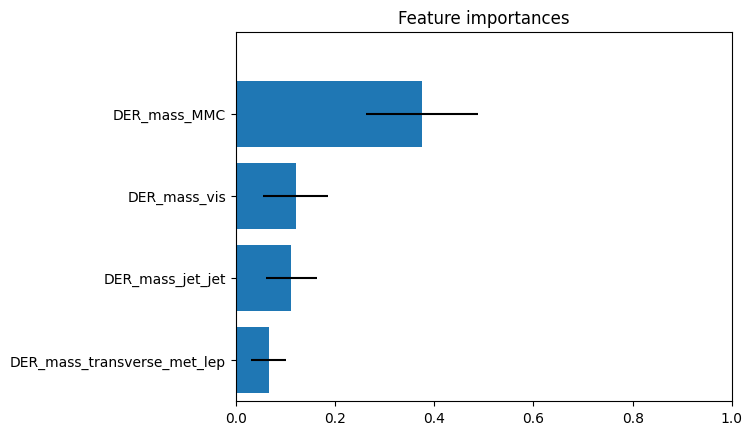

In [56]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]),
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
#pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]),
          labels=higgsdata_final2.columns[indices])
pl.ylim(21.5,26)
pl.xlim(0, 1)
pl.show()

Based on my Random Forest Classifier model, the 4 most important features are DER_mass_MMC, DER_mass_jet_jet, DER_mass_vis, and DER_mass_transverse_met_lep. DER_mass_MMC has the an importance of 0.38 +/- 0.11, which is over 3 times the value of the next two features. The DER_mass_jet_jet and DER_mass_vis features have importances of 0.12 and 0.11, respectively. Interestingly these are roughly equal to the error on the first feature. The last of these features, DER_mass_transverse_met_lep was found to have an importance of 0.07.

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [57]:
#I decide to do the feature importance method instead of grid importance
higgsdata.iloc[:, best_features_index]

NameError: ignored

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(...


In [ ]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
